# Multicollinearity

## ¿What is multicollinearity?

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model. For example:

FE: Food Expenditure

$$
FE_i = \beta_0 + \beta_1 Labor Income_i + \beta_2 Non-Labor Income_i + \beta_3 Total Income_i + u_i
$$

$$
Total Income_i = Labor Income_i + Non-Labor Income_i
$$

In this case, Total Income is not relevant since it is a linear combination of labor income and non-labor income and does not provide new information.

In [62]:
import numpy as np

In [63]:
import random

random.seed ( 10 )

#Create a matrix 10x10
A = np.zeros((10,10))

#9 columnas con distribución normal
for i in [0,1,2,3,4,5,6,7,8,9]:
    A[:,i]= np.random.normal(0,1,10)

#seleccionar 3 columnas y hacer combinacion lineal para completar columna 10
A_1 = A[:,0]
A_2 = A[:,3]
A_3 = A[:,6]
A[:,9]= A_1*0.5 + A_2*8.3 + A_3*6

#Calculamos la inversa de la matriz A
A_inversa = np.linalg.inv(A)
print(A_inversa)

#La matriz a no tiene rango completo, pues la columna 10 es combinación lineal de otras 3 columnas;
#por lo tanto, la matriz es singular y no puede hallarse su inversa.

[[ 3.96356112e+13 -3.49581557e+13 -7.72398765e+13 -3.51075669e+13
  -4.30332236e+13 -1.72212915e+13  1.91475212e+13 -2.23746346e+13
   3.23922750e+13  5.16146429e+13]
 [-7.70951009e-02 -2.31285303e-01  3.08380404e-01 -1.54190202e-01
  -1.54190202e-01 -1.92737752e-01  5.01118156e-01  1.54190202e-01
   2.45654170e-01 -1.04694622e-01]
 [ 1.66757755e-02  2.18869732e-01 -2.13975322e-01  2.44524812e-02
   1.29054322e-01 -9.83744270e-02 -6.46325335e-02  2.78684018e-01
   1.51626898e-01  2.18616727e-01]
 [ 6.57951146e+14 -5.80305384e+14 -1.28218195e+15 -5.82785611e+14
  -7.14351511e+14 -2.85873439e+14  3.17848852e+14 -3.71418934e+14
   5.37711766e+14  8.56803072e+14]
 [ 7.13098161e-02 -2.36915403e-01 -1.10169347e-01 -4.07359253e-01
  -5.38781782e-02 -3.58750016e-02  2.27678637e-01 -1.70667550e-01
   4.40342828e-02 -3.29241183e-01]
 [-1.00503503e-01 -9.35692959e-02 -2.52513615e-01 -1.06009971e-01
  -1.78481707e-01  1.47539976e-01  1.97754319e-01 -4.74263626e-02
   3.20813619e-01  1.37043285e-01

# Analyzing RCT data with Precision Adjustment

We analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 2, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period

In [64]:
import pandas as pd
import pyreadr

In [65]:
## loading the data
Penn = pd.read_csv("d:/Users/Manuela/Documents/GitHub/ECO224/Labs/data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]

### Histograma

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


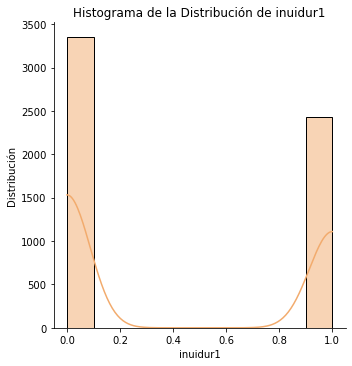

In [82]:
import matplotlib.pyplot as plot
import seaborn as sb

sb.displot(Penn['tg'] == 2, color='#F2AB6D', bins=10, kde=True) #creamos el gráfico en Seaborn

#configuramos en Matplotlib
plot.ylabel('Distribución')
plot.xlabel('inuidur1')
plot.title('Histograma de la Distribución de inuidur1')

plot.show()

In [3]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

In [4]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1


In [6]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [2, 0, 1]

## Model
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$
where $Y$ is the log of duration of unemployment, $D$ is a treatment indicators, and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation. Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.

We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has the interpretation of the causal effect of the treatment on the average outcome. We thus refer to $\beta_1$ as the average treatment effect (ATE). Note that the covariates, here are independent of the treatment $D$, so we can identify $\beta_1$ by just linear regression of $Y$ on $D$, without adding covariates. However we do add covariates in an effort to improve the precision of our estimates of the average treatment effect.

## Analysis
We consider

classical 2-sample approach, no adjustment (CL)
classical linear regression adjustment (CRA)
interactive regression adjusment (IRA)
and carry out robust inference using the estimatr R packages.

# Carry out covariate balance check
This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np

# Regress treatment on all covariates
I use data from R

In [8]:
y = Penn[['T2']].reset_index( drop = True )

In [14]:
# Get data from R
result = pyreadr.read_r('d:/Users/Manuela/Documents/GitHub/ECO224/Labs/data/m_reg3.RData')
X_vars = result['X1']

In [15]:
# model = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"
model_results = sm.OLS( y, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                     4.204
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           2.42e-39
Time:                        16:07:28   Log-Likelihood:                -4075.6
No. Observations:                5782   AIC:                             8357.
Df Residuals:                    5679   BIC:                             9043.
Df Model:                         102                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              0.5171 

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 102, but rank is 101
  warnings.warn('covariance of constraints does not have full '


We see that that even though this is a randomized experiment, balance conditions are failed.

# Model Specification
I use data from R.

In [16]:
# model specifications
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )

# no adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'

# adding controls
# formula_cra = 'log_inuidur1 ~ T4 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'
# Omitted dummies: q1, nondurable, muld

ols_cl = smf.ols( formula = formula_cl, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")

#getting data
# Get data from R
result = pyreadr.read_r('d:/Users/Manuela/Documents/GitHub/ECO224/Labs/data/ols_cra_reg3.RData')
X_vars = result['X1']

ols_cra = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_cl.summary())
print(ols_cra.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Fri, 24 Sep 2021   Prob (F-statistic):             0.0154
Time:                        16:08:08   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 102
  warnings.warn('covariance of constraints does not have full '


In [17]:
# create Y variable 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )

In [18]:
# Reset index to estimation
# Get data from R
result = pyreadr.read_r('d:/Users/Manuela/Documents/GitHub/ECO224/Labs/data/ols_ira_reg3.RData')
X_vars = result['S1']

ols_ira = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:08:20   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  warnings.warn('covariance of constraints does not have full '


# Partialling out with lasso

In [24]:
import hdmpy

ModuleNotFoundError: No module named 'multiprocess'

In [20]:
# Get data from R
result = pyreadr.read_r('d:/Users/Manuela/Documents/GitHub/ECO224/Labs/data/rlasso_ira_reg3.RData')
X_vars = result['S']

In [21]:
result = hdmpy.rlassoEffects( X_vars, log_inuidur1, index = 0 )       

rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , \
           result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 2) , columns = ['Coef.' , \
                            "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])
rlasso_ira

NameError: name 'hdmpy' is not defined

## Results

In [25]:
table2 = np.zeros((2, 4))
table2[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2TRUE']
table2[0,3] = rlasso_ira['Coef.']['T2']

table2[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE']
table2[1,3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns = ["$CL$", "$CRA$", "$IRA$", "$IRA Lasso$"], \
                      index = ["estimate","standard error"])
table2
table2.to_latex
print(table2.to_latex())

NameError: name 'rlasso_ira' is not defined